In [1]:
# Importing LIBRARIES
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import os
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Specifying the path of the data(train,test,validaton)
train = '../input/chest_xray/chest_xray/train'
test = '../input/chest_xray/chest_xray/test' 
val = '../input/chest_xray/chest_xray/val'

In [3]:
img_width,img_height= 150,150
input_shape = (img_width,img_height,3)

In [4]:
#It’s just a thing function that you use to get the output of node. It is also known as Transfer Function.


model = Sequential()
# The number of filters are 32 and the kernal_size is (3,3)
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(50))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(50))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
#Here we use RMSPROP optimizer and BINARY_CROSSENTROPY as loss function  
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [7]:

#ImageDataGenerator-Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).

train_datagen = ImageDataGenerator(rescale=1. / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [8]:

# Here we import images directly from Directory by using flow_from_directory method.
#flow_from_directory() automatically infers the labels from the directory structure of the folders containing images
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [9]:

#We Fit the model here using fit_generator as we are dealing with large datasets.
model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=17)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
100/100 [==============================] - 51s 511ms/step - loss: 0.4335 - acc: 0.8050 - val_loss: 0.8511 - val_acc: 0.6250
Epoch 2/20
100/100 [==============================] - 48s 484ms/step - loss: 0.2239 - acc: 0.9087 - val_loss: 0.6272 - val_acc: 0.6875
Epoch 3/20
100/100 [==============================] - 47s 474ms/step - loss: 0.2215 - acc: 0.9106 - val_loss: 0.8520 - val_acc: 0.6250
Epoch 4/20
100/100 [==============================] - 46s 463ms/step - loss: 0.2125 - acc: 0.9153 - val_loss: 1.1781 - val_acc: 0.6875
Epoch 5/20
100/100 [==============================] - 47s 468ms/step - loss: 0.1908 - acc: 0.9247 - val_loss: 1.2283 - val_acc: 0.5625
Epoch 6/20
100/100 [==============================] - 46s 459ms/step - loss: 0.1824 - acc: 0.9269 - val_loss: 1.6661 - val_acc: 0.6250
Epoch 7/20
100/100 [==============================] - 49s 488ms/step - loss: 0.1464 - acc: 0.9422 - val_loss: 1.1506 - val_acc: 0.6250
Epoch 8

In [10]:
#Accuracy of test data.
scores = model.evaluate_generator(test_generator,624/16)
print("\nAccuracy:"+" %.2f%%" % ( scores[1]*100))


Accuracy: 92.29%


In [11]:
# # saving model in Json format.
# model_json = model.to_json()
# with open("model.json","w") as json_file:
#     json_file.write(model_json)

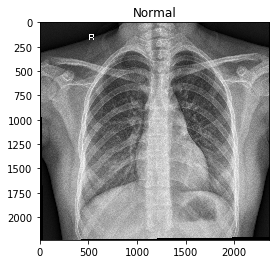

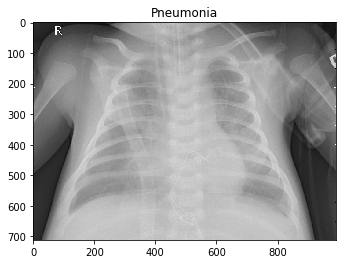

In [12]:
img_n = load_img('../input/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0927-0001.jpeg') 
plt.imshow(img_n)
plt.title("Normal")
plt.show()
img_p = load_img('../input/chest_xray/chest_xray/train/PNEUMONIA/person755_bacteria_2659.jpeg') 
plt.imshow(img_p) 
plt.title("Pneumonia")
plt.show()